<center>

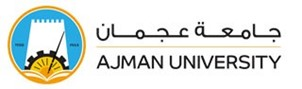

<center>

<font color='black' font size =6> **College: Engineering and Information Technology Department: Information Technology**

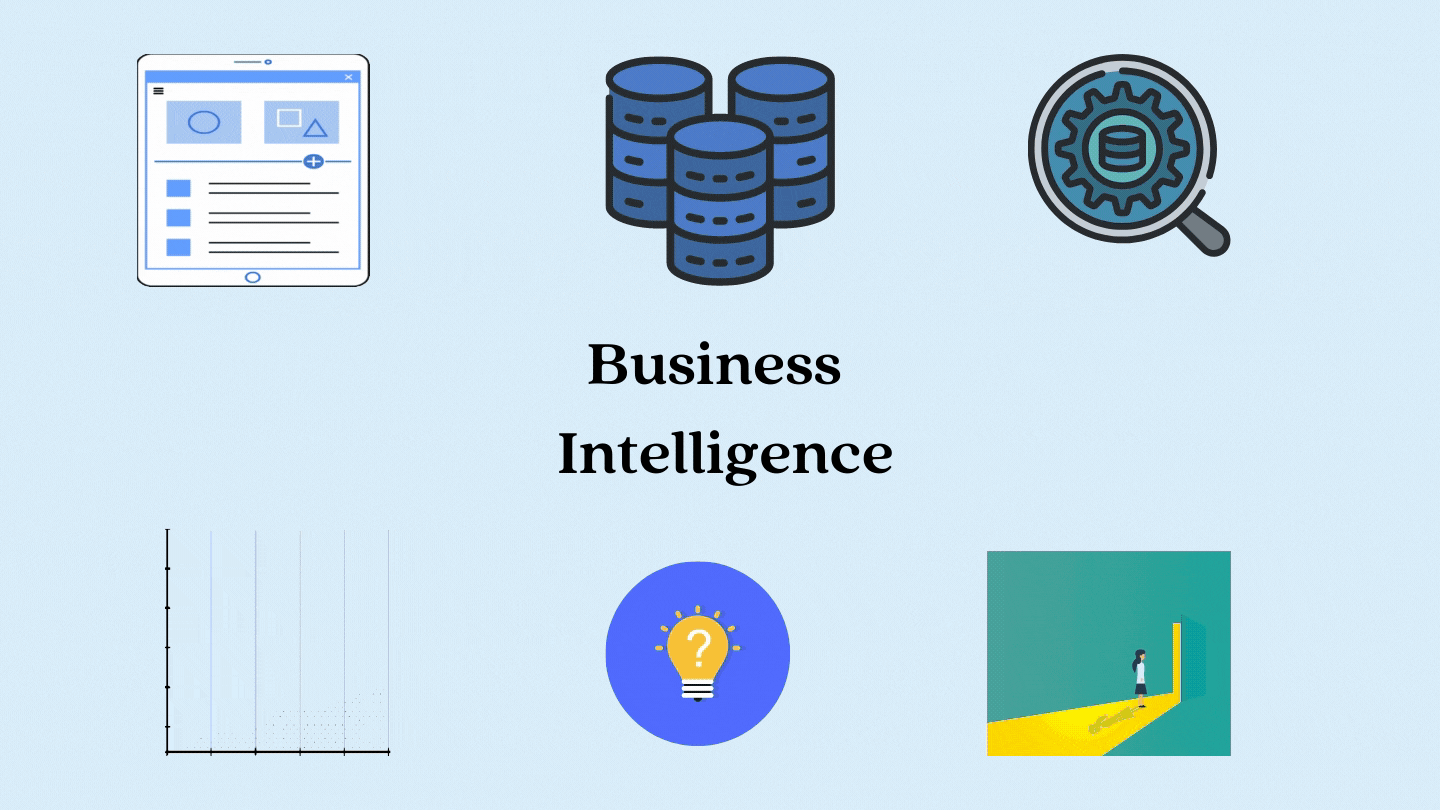

<center>
 Team Members :

```
 Ali Rashed Alzaabi - 202020176
```
```
Leena Alsalhi - 202110613
```
```
 Haniyah Alzaben - 202110616
```
```
Layan Ahmad – 202110844
```
```
Alya Alabdouli – 20211100
```
```
Maryam Fadhel – 202110910
```

<center>

<font color='blue' font size=6> **Busi. Intell.&Data Warehousing - INS402 (Ghazi AlNaymat)**


<center>

<font color='orange' font size =8>**Introduction**



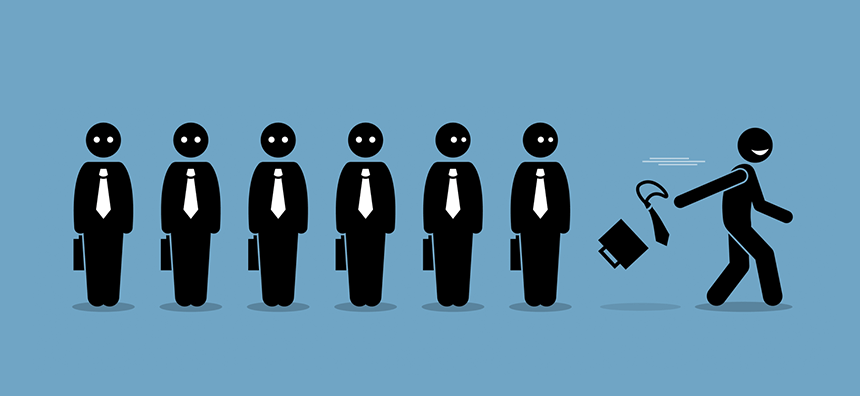

# Employee Attrition

---

Employee attrition, or turnover, poses a significant challenge for organizations worldwide. High attrition rates can lead to increased recruitment and training costs, loss of institutional knowledge, and reduced productivity. Understanding the factors that drive employee attrition and implementing proactive measures to retain valuable talent is essential for maintaining a competitive edge.



---


# Business Challenge
The organization seeks to address the following key issues:

- Uncertainty in Retention: Difficulty predicting which employees are at risk of leaving.
- Lack of Insights: Limited understanding of the factors contributing to employee turnover.
- Cost of Attrition: Increased expenses due to frequent hiring, onboarding, and training.
- Impact on Morale: The departure of key employees can demoralize the workforce and disrupt business operations.


---



Our data is obtained from :
https://www.kaggle.com/datasets/ravindrasinghrana/employeedataset/data?select=training_and_development_data.csv

#<font color='red' font size=6>**Topic 1**

# **Importing Necessary Libraries:**

---



First of all, we will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project.

---


In [1]:
# Data manipulation and processing
import pandas as pd
import numpy as np

# Date and time handling
from datetime import datetime

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning and preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Statistical analysis
from scipy import stats

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#**Loading the data**

In [2]:
# Load into pandas DataFrames
employee_df = pd.read_csv('/content/employee_data.csv')
engagement_df = pd.read_csv('/content/employee_engagement_survey_data.csv')
recruitment_df = pd.read_csv('/content/recruitment_data.csv')
training_df = pd.read_csv('/content/training_and_development_data.csv')

# **Data Cleaning**

###**Employee Data**

In [3]:
# Order emp_df by Emp_ID
employee_df = employee_df.sort_values(by='EmpID')

# If you want to reset the index after sorting:
employee_df = employee_df.reset_index(drop=True)

employee_df

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,1001,Susan,Exantus,29-Aug-19,NaN,Software Engineer,Angela Carlson,susan.exantus@bilearner.com,BPC,Active,...,Engineers,21-09-1957,MA,Engineer,Female,1749,Black,Married,Fully Meets,3
1,1002,Sandra,Martin,12-Dec-22,28-May-23,Software Engineer,Angela Hayes,sandra.martin@bilearner.com,NEL,Active,...,Catv,08-07-1950,MA,Foreman,Female,2135,Asian,Widowed,Fully Meets,3
2,1003,Keyla,Del Bosque,08-Mar-23,15-Mar-23,Software Engineer,Christina Copeland,keyla.del bosque@bilearner.com,WBL,Active,...,Field Operations,23-11-1973,MA,Foreman,Female,2176,White,Married,Fully Meets,3
3,1004,Andrew,Szabo,29-May-20,05-Mar-21,Software Engineer,Jennifer Cohen,andrew.szabo@bilearner.com,PYZ,Active,...,Project Management - Con,27-01-1957,MA,Coordinator,Male,2140,Black,Single,Fully Meets,3
4,1005,Luke,Patronick,16-Sep-22,NaN,Software Engineer,Mr. Jesus Richards,luke.patronick@bilearner.com,SVG,Active,...,Field Operations,28-07-1970,MA,Project Manager,Male,1844,Black,Divorced,Fully Meets,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,Leonel,Combs,01-Sep-21,NaN,Database Administrator,Summer Carter,leonel.combs@bilearner.com,MSC,Active,...,Catv,29-11-1999,MA,Laborer,Female,82286,White,Widowed,Fully Meets,3
2996,3997,Carmen,Frost,16-Jul-19,NaN,Database Administrator,Jordan George,carmen.frost@bilearner.com,EW,Active,...,Engineers,02-12-1946,TX,Project Manager,Male,72560,Black,Single,Needs Improvement,3
2997,3998,Ace,Krause,24-Dec-21,27-Jul-22,Database Administrator,Brittany Rubio,ace.krause@bilearner.com,CCDR,Terminated for Cause,...,Yard (Material Handling),22-01-1971,TX,Administrative,Female,82557,Other,Married,Fully Meets,3
2998,3999,Reuben,Davila,17-Apr-19,17-Aug-21,Database Administrator,John Henderson,reuben.davila@bilearner.com,BPC,Terminated for Cause,...,Engineers,01-02-1943,TX,Engineer,Male,13760,Asian,Single,Exceeds,3


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmpID                       3000 non-null   int64 
 1   FirstName                   3000 non-null   object
 2   LastName                    3000 non-null   object
 3   StartDate                   3000 non-null   object
 4   ExitDate                    1533 non-null   object
 5   Title                       3000 non-null   object
 6   Supervisor                  3000 non-null   object
 7   ADEmail                     3000 non-null   object
 8   BusinessUnit                3000 non-null   object
 9   EmployeeStatus              3000 non-null   object
 10  EmployeeType                3000 non-null   object
 11  PayZone                     3000 non-null   object
 12  EmployeeClassificationType  3000 non-null   object
 13  TerminationType             3000 non-null   obje

In [5]:
employee_df.nunique()

,0
EmpID,3000
FirstName,1597
LastName,1137
StartDate,1496
ExitDate,820
Title,32
Supervisor,2952
ADEmail,2998
BusinessUnit,10
EmployeeStatus,5


In [6]:
# Check the column that has <= 32 unique values
for col in employee_df:
  if len(employee_df[col].value_counts()) <= 32:
    print(f'Column: ', col, '\nUnique Values: ', employee_df[col].sort_values().unique(), '\n_____________________________________')

Column:  Title 
Unique Values:  ['Accountant I' 'Administrative Assistant' 'Area Sales Manager'
 'BI Developer' 'BI Director' 'CIO' 'Data Analyst' 'Data Analyst '
 'Data Architect' 'Database Administrator' 'Director of Operations'
 'Director of Sales' 'Enterprise Architect' 'IT Director'
 'IT Manager - DB' 'IT Manager - Infra' 'IT Manager - Support'
 'IT Support' 'Network Engineer' 'President & CEO'
 'Principal Data Architect' 'Production Manager' 'Production Technician I'
 'Production Technician II' 'Sales Manager' 'Senior BI Developer'
 'Shared Services Manager' 'Software Engineer'
 'Software Engineering Manager' 'Sr. Accountant' 'Sr. DBA'
 'Sr. Network Engineer'] 
_____________________________________
Column:  BusinessUnit 
Unique Values:  ['BPC' 'CCDR' 'EW' 'MSC' 'NEL' 'PL' 'PYZ' 'SVG' 'TNS' 'WBL'] 
_____________________________________
Column:  EmployeeStatus 
Unique Values:  ['Active' 'Future Start' 'Leave of Absence' 'Terminated for Cause'
 'Voluntarily Terminated'] 
___________

In the 'Title' column, there are exactly the same values but being recorded differently because of the white space. Also for the DepartmentType, so we removed the white space.

In [7]:
employee_df['DepartmentType'] = employee_df['DepartmentType'].str.rstrip()
employee_df['Title'] = employee_df['Title'].str.rstrip()

In [8]:
employee_df['Title'].sort_values().unique()

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Analyst',
       'Data Architect', 'Database Administrator',
       'Director of Operations', 'Director of Sales',
       'Enterprise Architect', 'IT Director', 'IT Manager - DB',
       'IT Manager - Infra', 'IT Manager - Support', 'IT Support',
       'Network Engineer', 'President & CEO', 'Principal Data Architect',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Sr. Network Engineer'], dtype=object)

**Removing Duplicate**

In [9]:
employee_df.duplicated().sum()

0

**Feature Engineering**

In [10]:
# Convert 'StartDate', 'ExitDate', and 'DOB' columns to datetime format
employee_df['StartDate'] = pd.to_datetime(employee_df['StartDate'], errors='coerce')
employee_df['ExitDate'] = pd.to_datetime(employee_df['ExitDate'], errors='coerce')
employee_df['DOB'] = pd.to_datetime(employee_df['DOB'], errors='coerce')

In [11]:
employee_df['EmploymentDuration(Years)'] = ((employee_df['ExitDate'].fillna(datetime.now()) - employee_df['StartDate']).dt.days / 365.25).round()

In [12]:
#employee_df['StartYear'] = employee_df['StartDate'].dt.year
#employee_df['StartMonth'] = employee_df['StartDate'].dt.month
#employee_df['StartQuarter'] = employee_df['StartDate'].dt.quarter
#employee_df['StartDay'] = employee_df['StartDate'].dt.day

In [13]:
#employee_df['ExitYear'] = employee_df['ExitDate'].dt.year
#employee_df['ExitMonth'] = employee_df['ExitDate'].dt.month
#employee_df['ExitQuarter'] = employee_df['ExitDate'].dt.quarter
#employee_df['ExitDay'] = employee_df['ExitDate'].dt.day

In [14]:
employee_df['Age'] = ((datetime.now() - employee_df['DOB']).dt.days / 365.25).astype(int)

In [15]:
# Assuming 'employee_df' has the columns 'StartDate' and 'DOB' already in datetime format
current_year = datetime.now().year

# Calculate if the employee is near retirement (Yes/No)
employee_df['NearRetirement'] = employee_df['StartDate'].dt.year + (65 - employee_df['DOB'].dt.year)
employee_df['NearRetirement'] = employee_df['NearRetirement'].apply(lambda x: 'Yes' if x <= current_year else 'No')

In [16]:
from datetime import date

# Assign today's date
today = date.today()

# Create the 'IsActive' column with meaningful categories
employee_df['IsActive'] = employee_df['ExitDate'].apply(
    lambda x: 'Active' if pd.isna(x) else 'Not Active')

**Dropping Irrelevant Features**

In [17]:
employee_df = employee_df.drop([
    'FirstName',            # Employee name
    'LastName',             # Employee name
    'StartDate',            # Used to calculate tenure, not needed raw
    'ExitDate',             # Used to determine if exited, not needed raw
    'Supervisor',           # Specific supervisor name
    'ADEmail',              # Employee email
    'LocationCode',         # Raw location data
    'TerminationDescription',
    'DOB'], axis=1)

employee_df

,EmpID,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,Division,...,JobFunctionDescription,GenderCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,EmploymentDuration(Years),Age,NearRetirement,IsActive
0,1001,Software Engineer,BPC,Active,Part-Time,Zone A,Part-Time,Unk,Software Engineering,Engineers,...,Engineer,Female,Black,Married,Fully Meets,3,5.0,67,Yes,Active
1,1002,Software Engineer,NEL,Active,Part-Time,Zone A,Temporary,Involuntary,Software Engineering,Catv,...,Foreman,Female,Asian,Widowed,Fully Meets,3,0.0,74,Yes,Not Active
2,1003,Software Engineer,WBL,Active,Contract,Zone A,Part-Time,Voluntary,Software Engineering,Field Operations,...,Foreman,Female,White,Married,Fully Meets,3,0.0,51,Yes,Not Active
3,1004,Software Engineer,PYZ,Active,Part-Time,Zone C,Part-Time,Involuntary,Software Engineering,Project Management - Con,...,Coordinator,Male,Black,Single,Fully Meets,3,1.0,67,Yes,Not Active
4,1005,Software Engineer,SVG,Active,Full-Time,Zone B,Temporary,Unk,Software Engineering,Field Operations,...,Project Manager,Male,Black,Divorced,Fully Meets,3,2.0,54,Yes,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,Database Administrator,MSC,Active,Part-Time,Zone C,Full-Time,Unk,IT/IS,Catv,...,Laborer,Female,White,Widowed,Fully Meets,3,3.0,25,Yes,Active
2996,3997,Database Administrator,EW,Active,Contract,Zone A,Temporary,Unk,IT/IS,Engineers,...,Project Manager,Male,Black,Single,Needs Improvement,3,5.0,78,Yes,Active
2997,3998,Database Administrator,CCDR,Terminated for Cause,Full-Time,Zone B,Full-Time,Resignation,IT/IS,Yard (Material Handling),...,Administrative,Female,Other,Married,Fully Meets,3,1.0,53,Yes,Not Active
2998,3999,Database Administrator,BPC,Terminated for Cause,Full-Time,Zone B,Full-Time,Involuntary,IT/IS,Engineers,...,Engineer,Male,Asian,Single,Exceeds,3,2.0,81,Yes,Not Active


**Dealing with null values**

In [18]:
def data_description(dataframe):
    description = pd.DataFrame({'Columns':dataframe.columns,
                                'Dtype' : [dataframe[i].dtype for i in dataframe.columns],
                                'Nunique Values': [dataframe[i].nunique() for i in dataframe.columns],
                                'Null Values': [dataframe[i].isna().sum() for i in dataframe.columns]})
    return description

data_description(employee_df)

,Columns,Dtype,Nunique Values,Null Values
0,EmpID,int64,3000,0
1,Title,object,31,0
2,BusinessUnit,object,10,0
3,EmployeeStatus,object,5,0
4,EmployeeType,object,3,0
5,PayZone,object,3,0
6,EmployeeClassificationType,object,3,0
7,TerminationType,object,5,0
8,DepartmentType,object,6,0
9,Division,object,25,0


We will drop near retirment because it is a constant feature, which has only one unique value indicating a zero variance across the column.

In [19]:
employee_df = employee_df.drop('NearRetirement',axis=1)
employee_df

,EmpID,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,Division,State,JobFunctionDescription,GenderCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,EmploymentDuration(Years),Age,IsActive
0,1001,Software Engineer,BPC,Active,Part-Time,Zone A,Part-Time,Unk,Software Engineering,Engineers,MA,Engineer,Female,Black,Married,Fully Meets,3,5.0,67,Active
1,1002,Software Engineer,NEL,Active,Part-Time,Zone A,Temporary,Involuntary,Software Engineering,Catv,MA,Foreman,Female,Asian,Widowed,Fully Meets,3,0.0,74,Not Active
2,1003,Software Engineer,WBL,Active,Contract,Zone A,Part-Time,Voluntary,Software Engineering,Field Operations,MA,Foreman,Female,White,Married,Fully Meets,3,0.0,51,Not Active
3,1004,Software Engineer,PYZ,Active,Part-Time,Zone C,Part-Time,Involuntary,Software Engineering,Project Management - Con,MA,Coordinator,Male,Black,Single,Fully Meets,3,1.0,67,Not Active
4,1005,Software Engineer,SVG,Active,Full-Time,Zone B,Temporary,Unk,Software Engineering,Field Operations,MA,Project Manager,Male,Black,Divorced,Fully Meets,3,2.0,54,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,Database Administrator,MSC,Active,Part-Time,Zone C,Full-Time,Unk,IT/IS,Catv,MA,Laborer,Female,White,Widowed,Fully Meets,3,3.0,25,Active
2996,3997,Database Administrator,EW,Active,Contract,Zone A,Temporary,Unk,IT/IS,Engineers,TX,Project Manager,Male,Black,Single,Needs Improvement,3,5.0,78,Active
2997,3998,Database Administrator,CCDR,Terminated for Cause,Full-Time,Zone B,Full-Time,Resignation,IT/IS,Yard (Material Handling),TX,Administrative,Female,Other,Married,Fully Meets,3,1.0,53,Not Active
2998,3999,Database Administrator,BPC,Terminated for Cause,Full-Time,Zone B,Full-Time,Involuntary,IT/IS,Engineers,TX,Engineer,Male,Asian,Single,Exceeds,3,2.0,81,Not Active


In [20]:
#employee_df.to_csv('employee_data1.csv', index=False)

### **Engagement Data**

In [21]:
engagement_df

,Employee ID,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score
0,1001,10-10-2022,2,5,5
1,1002,03-08-2023,4,5,3
2,1003,03-01-2023,2,5,2
3,1004,30-07-2023,3,5,3
4,1005,19-06-2023,2,4,5
...,...,...,...,...,...
2995,3996,14-04-2023,3,5,1
2996,3997,10-09-2022,2,4,1
2997,3998,22-02-2023,5,5,2
2998,3999,02-10-2022,5,4,2


In [22]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Employee ID              3000 non-null   int64 
 1   Survey Date              3000 non-null   object
 2   Engagement Score         3000 non-null   int64 
 3   Satisfaction Score       3000 non-null   int64 
 4   Work-Life Balance Score  3000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 117.3+ KB


In [23]:
engagement_df.nunique()

,0
Employee ID,3000
Survey Date,366
Engagement Score,5
Satisfaction Score,5
Work-Life Balance Score,5


In [24]:
engagement_df.duplicated().sum()

0

In [25]:
engagement_df = engagement_df.drop('Survey Date',axis=1)

In [26]:
engagement_df.dtypes

,0
Employee ID,int64
Engagement Score,int64
Satisfaction Score,int64
Work-Life Balance Score,int64


In [27]:
emp_eng =engagement_df

def data_description(dataframe):
    description = pd.DataFrame({'Columns':dataframe.columns,
                                'Dtype' : [dataframe[i].dtype for i in dataframe.columns],
                                'Nunique Values': [dataframe[i].nunique() for i in dataframe.columns],
                                'Null Values': [dataframe[i].isna().sum() for i in dataframe.columns]})
    return description

data_description(emp_eng)

,Columns,Dtype,Nunique Values,Null Values
0,Employee ID,int64,3000,0
1,Engagement Score,int64,5,0
2,Satisfaction Score,int64,5,0
3,Work-Life Balance Score,int64,5,0


In [28]:
#engagement_df.to_csv('employee_engagement_survey_data1.csv', index=False)

###**Recruitment Data**

In [29]:
recruitment_df

,Applicant ID,Application Date,First Name,Last Name,Gender,Date of Birth,Phone Number,Email,Address,City,State,Zip Code,Country,Education Level,Years of Experience,Desired Salary,Job Title,Status
0,1001,03-Jun-23,Scott,Sheppard,Male,31-08-1992,421-429-7655x39421,perezjanet@example.org,597 Smith Point,Hollandfort,NV,57588,Micronesia,High School,8,60103.21,Chief Technology Officer,Interviewing
1,1002,15-May-23,Stanley,Lewis,Male,29-04-1965,+1-451-574-5308x1681,grossmark@example.com,8116 Stuart Loop,Port Margaretfurt,TN,14726,Greenland,Bachelor's Degree,17,64575.84,"Designer, furniture",Rejected
2,1003,04-Aug-23,Javier,Li,Female,10-03-1973,(858)901-5499,katiemaldonado@example.com,5940 Barr Villages Suite 075,Dianaland,TX,4699,China,PhD,20,39422.71,"Sound technician, broadcasting/film/video",Rejected
3,1004,28-Jul-23,Christopher,Johnston,Other,04-04-2001,(853)681-1839x2010,sheila73@example.com,442 Lewis Mount,Youngfurt,GA,34455,Ghana,High School,8,51045.11,Air cabin crew,Rejected
4,1005,05-Jun-23,Melissa,Hicks,Other,17-06-1978,364-575-8478x67812,emilypatterson@example.org,95961 Taylor Circles Apt. 169,East Ashleyborough,IN,21014,Solomon Islands,Master's Degree,0,52792.86,Art therapist,Interviewing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,18-May-23,Melinda,Butler,Male,25-11-1993,001-324-747-3549x4392,davisvickie@example.org,1307 Stephen Walk Apt. 998,West Jennifer,WY,17130,India,PhD,20,65428.69,"Psychologist, forensic",Offered
2996,3997,12-Jul-23,Latasha,Johnson,Male,29-01-1978,(870)454-9481x49987,gpeterson@example.net,2945 Morse Wells,New Lindsey,MH,81966,Turkey,Bachelor's Degree,0,37297.03,Operational investment banker,Applied
2997,3998,19-Jun-23,Cheryl,Gill,Other,08-02-2000,001-847-873-3665,bschultz@example.net,36716 Kevin Locks Suite 422,Schmidtfurt,ME,59399,Maldives,High School,10,31093.70,Petroleum engineer,Rejected
2998,3999,16-May-23,Danielle,Villegas,Female,08-08-1994,(385)467-6434x67311,alvarezstephen@example.net,0983 Jeremy Burgs,Michaelhaven,KY,37855,Ghana,Bachelor's Degree,14,59442.38,Housing manager/officer,Applied


In [30]:
recruitment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Applicant ID         3000 non-null   int64  
 1   Application Date     3000 non-null   object 
 2   First Name           3000 non-null   object 
 3   Last Name            3000 non-null   object 
 4   Gender               3000 non-null   object 
 5   Date of Birth        3000 non-null   object 
 6   Phone Number         3000 non-null   object 
 7   Email                3000 non-null   object 
 8   Address              3000 non-null   object 
 9   City                 3000 non-null   object 
 10  State                3000 non-null   object 
 11  Zip Code             3000 non-null   int64  
 12  Country              3000 non-null   object 
 13  Education Level      3000 non-null   object 
 14  Years of Experience  3000 non-null   int64  
 15  Desired Salary       3000 non-null   f

In [31]:
# Print unique values in the 'Country' column
unique_countries = recruitment_df['Country'].unique()
print("Unique values in the 'Country' column:")
print(unique_countries)

Unique values in the 'Country' column:
['Micronesia' 'Greenland' 'China' 'Ghana' 'Solomon Islands' 'Liberia'
 'Congo' 'Pitcairn Islands' 'Spain' 'Gabon' 'Switzerland' 'Guam'
 'Central African Republic' 'Kenya' 'Belize' 'Morocco' 'Poland' 'Ukraine'
 'Costa Rica' 'United Arab Emirates' 'Kyrgyz Republic' 'Belgium'
 'Saint Kitts and Nevis' 'Norway' 'Iceland' 'Macao' 'Cape Verde' 'Comoros'
 'Tunisia' 'Burkina Faso' 'Bahrain' 'Anguilla' 'Canada' 'Nauru'
 'United States Virgin Islands' 'Jordan' 'Niger'
 'Antarctica (the territory South of 60 deg S)' 'Hong Kong' 'Luxembourg'
 'Afghanistan' 'Holy See (Vatican City State)' 'Monaco' 'Marshall Islands'
 'Faroe Islands' 'Bouvet Island (Bouvetoya)' 'Niue' 'San Marino' 'Cuba'
 'Colombia' 'Sweden' 'Western Sahara' 'Pakistan' 'Malaysia' 'Palau'
 'Greece' 'French Guiana' 'Egypt' 'Uzbekistan' 'Argentina' 'Swaziland'
 'Paraguay' 'Mauritania' 'Cyprus' 'Cambodia' 'Hungary' 'Botswana'
 'Kiribati' 'Estonia' 'Ethiopia' 'Yemen' 'Bolivia' 'Mayotte'
 'Turkmenista

In [32]:
recruitment_df.nunique()

,0
Applicant ID,3000
Application Date,92
First Name,538
Last Name,813
Gender,3
Date of Birth,2718
Phone Number,2601
Email,2977
Address,3000
City,2709


In [33]:
recruitment_df.duplicated().sum()

0

In [34]:
recruitment_df.dtypes

,0
Applicant ID,int64
Application Date,object
First Name,object
Last Name,object
Gender,object
Date of Birth,object
Phone Number,object
Email,object
Address,object
City,object


In [35]:
# Dropping irrelevant columns
recruitment_df = recruitment_df.drop(columns=['Application Date', 'First Name', 'Last Name', 'Date of Birth', 'Phone Number',
                                              'Email', 'State', 'Address', 'Zip Code'], axis=1)

In [36]:
def data_description(dataframe):
    description = pd.DataFrame({'Columns':dataframe.columns,
                                'Dtype' : [dataframe[i].dtype for i in dataframe.columns],
                                'Nunique Values': [dataframe[i].nunique() for i in dataframe.columns],
                                'Null Values': [dataframe[i].isna().sum() for i in dataframe.columns]})
    return description

data_description(recruitment_df)

,Columns,Dtype,Nunique Values,Null Values
0,Applicant ID,int64,3000,0
1,Gender,object,3,0
2,City,object,2709,0
3,Country,object,243,0
4,Education Level,object,4,0
5,Years of Experience,int64,21,0
6,Desired Salary,float64,2999,0
7,Job Title,object,636,0
8,Status,object,5,0


In [37]:
#recruitment_df.to_csv('recruitment_data1.csv', index=False)

### **Training Data**

In [38]:
training_df

,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1001,21-Sep-22,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
1,1002,19-Jul-23,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2,1003,24-Feb-23,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
3,1004,12-Jan-23,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
4,1005,12-May-23,Communication Skills,External,Passed,Bruceshire,Heather Shaffer,4,145.99
...,...,...,...,...,...,...,...,...,...
2995,3996,09-Jan-23,Customer Service,Internal,Failed,North Emily,Carmen Cortez,2,808.51
2996,3997,19-Sep-22,Project Management,External,Failed,West Zachary,Katrina Parker,4,629.16
2997,3998,26-Sep-22,Customer Service,External,Completed,Port Kyle,Andre Donaldson,1,994.09
2998,3999,02-Jul-23,Leadership Development,Internal,Incomplete,Williamsland,Brian Obrien,5,477.78


In [39]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              3000 non-null   int64  
 1   Training Date            3000 non-null   object 
 2   Training Program Name    3000 non-null   object 
 3   Training Type            3000 non-null   object 
 4   Training Outcome         3000 non-null   object 
 5   Location                 3000 non-null   object 
 6   Trainer                  3000 non-null   object 
 7   Training Duration(Days)  3000 non-null   int64  
 8   Training Cost            3000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 211.1+ KB


In [40]:
training_df.duplicated().sum()

0

In [41]:
# Drop irrelevant columns from the training dataset
training_df = training_df.drop(columns=[
    'Training Date',
    'Trainer'], axis=1)

In [42]:
def data_description(dataframe):
    description = pd.DataFrame({'Columns':dataframe.columns,
                                'Dtype' : [dataframe[i].dtype for i in dataframe.columns],
                                'Nunique Values': [dataframe[i].nunique() for i in dataframe.columns],
                                'Null Values': [dataframe[i].isna().sum() for i in dataframe.columns]})
    return description

data_description(training_df)

,Columns,Dtype,Nunique Values,Null Values
0,Employee ID,int64,3000,0
1,Training Program Name,object,5,0
2,Training Type,object,2,0
3,Training Outcome,object,4,0
4,Location,object,2738,0
5,Training Duration(Days),int64,5,0
6,Training Cost,float64,2965,0


In [43]:
#training_df.to_csv('training_and_development_data1.csv', index=False)

## **Final Merge**

In [44]:
# Standardize key column names
employee_df.rename(columns={'EmpID': 'EmpID'}, inplace=True)
engagement_df.rename(columns={'Employee ID': 'EmpID'}, inplace=True)
recruitment_df.rename(columns={'Applicant ID': 'EmpID'}, inplace=True)
training_df.rename(columns={'Employee ID': 'EmpID'}, inplace=True)

# Merge all datasets on the standardized column 'EmpID'
emp_df = employee_df.merge(engagement_df, on='EmpID', how='inner') \
               .merge(recruitment_df, on='EmpID', how='inner') \
               .merge(training_df, on='EmpID', how='inner')

In [45]:
# Move the 'isActive' column to the last position
emp_df = emp_df[[col for col in emp_df.columns if col != 'IsActive'] + ['IsActive']]

emp_df

,EmpID,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,Division,...,Desired Salary,Job Title,Status,Training Program Name,Training Type,Training Outcome,Location,Training Duration(Days),Training Cost,IsActive
0,1001,Software Engineer,BPC,Active,Part-Time,Zone A,Part-Time,Unk,Software Engineering,Engineers,...,60103.21,Chief Technology Officer,Interviewing,Customer Service,Internal,Failed,Port Greg,4,510.83,Active
1,1002,Software Engineer,NEL,Active,Part-Time,Zone A,Temporary,Involuntary,Software Engineering,Catv,...,64575.84,"Designer, furniture",Rejected,Leadership Development,Internal,Failed,Brandonview,2,582.37,Not Active
2,1003,Software Engineer,WBL,Active,Contract,Zone A,Part-Time,Voluntary,Software Engineering,Field Operations,...,39422.71,"Sound technician, broadcasting/film/video",Rejected,Technical Skills,Internal,Incomplete,Port Briannahaven,4,777.06,Not Active
3,1004,Software Engineer,PYZ,Active,Part-Time,Zone C,Part-Time,Involuntary,Software Engineering,Project Management - Con,...,51045.11,Air cabin crew,Rejected,Customer Service,Internal,Completed,Knightborough,2,824.30,Not Active
4,1005,Software Engineer,SVG,Active,Full-Time,Zone B,Temporary,Unk,Software Engineering,Field Operations,...,52792.86,Art therapist,Interviewing,Communication Skills,External,Passed,Bruceshire,4,145.99,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,Database Administrator,MSC,Active,Part-Time,Zone C,Full-Time,Unk,IT/IS,Catv,...,65428.69,"Psychologist, forensic",Offered,Customer Service,Internal,Failed,North Emily,2,808.51,Active
2996,3997,Database Administrator,EW,Active,Contract,Zone A,Temporary,Unk,IT/IS,Engineers,...,37297.03,Operational investment banker,Applied,Project Management,External,Failed,West Zachary,4,629.16,Active
2997,3998,Database Administrator,CCDR,Terminated for Cause,Full-Time,Zone B,Full-Time,Resignation,IT/IS,Yard (Material Handling),...,31093.70,Petroleum engineer,Rejected,Customer Service,External,Completed,Port Kyle,1,994.09,Not Active
2998,3999,Database Administrator,BPC,Terminated for Cause,Full-Time,Zone B,Full-Time,Involuntary,IT/IS,Engineers,...,59442.38,Housing manager/officer,Applied,Leadership Development,Internal,Incomplete,Williamsland,5,477.78,Not Active


In [46]:
emp_df.to_csv('emp_data.csv', index=False)

In [46]:
numerical_columns = [
    'EmploymentDuration(Years)', 'Age',
    'Desired Salary', 'Training Duration(Days)', 'Training Cost',
    'Satisfaction Score', 'Work-Life Balance Score', 'Years of Experience'
]

# Check min and max values for each numerical feature
min_max_values = {}
for col in numerical_columns:
    min_val = emp_df[col].min()
    max_val = emp_df[col].max()
    min_max_values[col] = (min_val, max_val)

In [47]:
min_max_values

{'EmploymentDuration(Years)': (0.0, 6.0),
 'Age': (23, 83),
 'Desired Salary': (30047.22, 99992.66),
 'Training Duration(Days)': (1, 5),
 'Training Cost': (100.04, 999.97),
 'Satisfaction Score': (1, 5),
 'Work-Life Balance Score': (1, 5),
 'Years of Experience': (0, 20)}

In [48]:
def data_description(dataframe):
    description = pd.DataFrame({'Columns':dataframe.columns,
                                'Dtype' : [dataframe[i].dtype for i in dataframe.columns],
                                'Nunique Values': [dataframe[i].nunique() for i in dataframe.columns],
                                'Null Values': [dataframe[i].isna().sum() for i in dataframe.columns]})
    return description

data_description(emp_df)

,Columns,Dtype,Nunique Values,Null Values
0,EmpID,int64,3000,0
1,Title,object,31,0
2,BusinessUnit,object,10,0
3,EmployeeStatus,object,5,0
4,EmployeeType,object,3,0
5,PayZone,object,3,0
6,EmployeeClassificationType,object,3,0
7,TerminationType,object,5,0
8,DepartmentType,object,6,0
9,Division,object,25,0


In [49]:
# Drop all datetime columns
#emp_df = emp_df.drop(columns=['EmpID'])

In [50]:
# Calculate the counts of 'IsActive' values
isactive_counts = emp_df['IsActive'].value_counts().reset_index()
# Rename the columns for the pie chart
isactive_counts.columns = ['IsActive', 'Count']

# Create the pie chart
fig = px.pie(
    isactive_counts,
    names='IsActive',
    values='Count',
    title="Distribution of 'IsActive' Column",
    color='IsActive',
    color_discrete_map={'Active': '#1f77b4', 'Not Active': '#ff7f0e'}  # Custom colors
)

# Update layout for size and styling
fig.update_layout(
    height=600,  # Adjust height
    width=800,   # Adjust width
    title=dict(font_size=24),  # Title font size
    legend=dict(
        title="IsActive Status",
        font=dict(size=14),  # Legend font size
        orientation="h",  # Horizontal legend
        x=0.5, y=-0.1,  # Centered below the plot
        xanchor="center",
        yanchor="top"
    ),
    template="plotly_white"  # Set a white background
)

fig.show()

In [51]:
# Check for null values in emp_df
null_counts = emp_df.isnull().sum()

# Display null values if they exist
if null_counts[null_counts > 0].empty:
    print("No null values in emp_df.")
else:
    print("Null Values in emp_df:")
    print(null_counts[null_counts > 0].reset_index(name="Null Count").rename(columns={"index": "Column"}))

No null values in emp_df.


In [52]:
# Find and display duplicate columns
duplicate_columns = emp_df.T.duplicated(keep=False)

if duplicate_columns.any():
    print("Duplicate Columns:")
    print(emp_df.columns[duplicate_columns].tolist())
else:
    print("No duplicate columns found.")

No duplicate columns found.


In [53]:
# Find and display duplicate rows
duplicate_rows = employee_df.duplicated(keep=False)

if duplicate_rows.any():
    print("Duplicate Rows:")
    print(employee_df[duplicate_rows])
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [54]:
"""import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify all object columns
object_columns = emp_df.select_dtypes(include=['object']).columns

# Step 2: Create a new dataset to hold the encoded values
encoded_df = emp_df.copy()

# Step 3: Apply encoding
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(emp_df[col])  # Apply encoding to the copied dataset
    label_encoders[col] = le  # Save the encoder for inverse_transform if needed later

# Optionally, display the encoded dataset
encoded_df"""

"import pandas as pd\nfrom sklearn.preprocessing import LabelEncoder\n\n# Step 1: Identify all object columns\nobject_columns = emp_df.select_dtypes(include=['object']).columns\n\n# Step 2: Create a new dataset to hold the encoded values\nencoded_df = emp_df.copy()\n\n# Step 3: Apply encoding\nlabel_encoders = {}\n\nfor col in object_columns:\n    le = LabelEncoder()\n    encoded_df[col] = le.fit_transform(emp_df[col])  # Apply encoding to the copied dataset\n    label_encoders[col] = le  # Save the encoder for inverse_transform if needed later\n\n# Optionally, display the encoded dataset\nencoded_df"

### **Encoding**

---

**Label Encoding:**
We applied Label Encoding to all categorical columns (object type) except Country, Job Title, and IsActive. This was done because:

These columns likely have nominal categories, and Label Encoding converts them into numerical values suitable for machine learning models.
The columns Country and Job Title were left out because we wanted to apply Target Encoding to them (explained below), and IsActive requires binary mapping instead of direct encoding.
Binary Mapping for IsActive:

**The IsActive column was mapped to numeric values:**

"Active" was assigned 1 and "Not Active" was assigned 0.
This binary format is useful as it simplifies the target variable into a machine-readable form.

**Target Encoding:**

For the columns Country and Job Title, we used Target Encoding because:

These columns may have a large number of unique categories, making Label Encoding unsuitable as it would imply an ordinal relationship that doesn’t exist.
Target Encoding replaces each category with the average target value (IsActive) for that category, creating a meaningful numeric representation based on its relationship with the target variable.

Smoothing in Target Encoding:

Smoothing was applied using a parameter alpha to balance the mean of the category with the global mean. This prevents categories with very few samples from having extreme target-encoded values.
The formula used ensures that categories with fewer samples are closer to the global mean, while those with many samples lean toward their own mean.

In [55]:
"""import joblib
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify all object columns
object_columns = emp_df.select_dtypes(include=['object']).columns

# Step 2: Create a new dataset to hold the encoded values
encoded_df = emp_df.copy()

# Step 3: Apply label encoding to all categorical columns except 'Job Title' and 'Country'
label_encoders = {}
for col in object_columns:
    if col not in ['Country', 'Job Title', 'IsActive']:  # Skip 'Country' and 'Job Title' for label encoding
        le = LabelEncoder()
        encoded_df[col] = le.fit_transform(emp_df[col])  # Apply encoding to the copied dataset
        label_encoders[col] = le  # Save the encoder for inverse_transform if needed later

# Step 4: Convert the 'IsActive' column to numeric (1 for Active, 0 for Not Active)
encoded_df['IsActive'] = encoded_df['IsActive'].map({'Active': 1, 'Not Active': 0})

# Step 5: Apply target encoding to 'Country' and 'Job Title'
target_encoders = {}  # Initialize dictionary for target encoders
target_column = 'IsActive'  # The target column is now numeric (1 or 0)

# Calculate the global mean of the target variable
global_mean = encoded_df[target_column].mean()

# Target encode 'Country'
country_means = encoded_df.groupby('Country')[target_column].mean()
country_counts = encoded_df.groupby('Country').size()
alpha = 10  # Smoothing parameter (adjust as needed)
country_smoothed_means = (country_counts * country_means + alpha * global_mean) / (country_counts + alpha)

# Overwrite 'Country' with target-encoded values and save the encoder
encoded_df['Country'] = encoded_df['Country'].map(country_smoothed_means).fillna(global_mean)
target_encoders['Country'] = country_smoothed_means  # Save the encoding for 'Country'

# Target encode 'Job Title'
job_title_means = encoded_df.groupby('Job Title')[target_column].mean()
job_title_counts = encoded_df.groupby('Job Title').size()
job_title_smoothed_means = (job_title_counts * job_title_means + alpha * global_mean) / (job_title_counts + alpha)

# Overwrite 'Job Title' with target-encoded values and save the encoder
encoded_df['Job Title'] = encoded_df['Job Title'].map(job_title_smoothed_means).fillna(global_mean)
target_encoders['Job Title'] = job_title_smoothed_means  # Save the encoding for 'Job Title'

# Display the updated dataframe
encoded_df

# Save the label encoders, target encoders, and scaler
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(target_encoders, 'target_encoders.pkl')  # Save the target encoders"""

"import joblib\nfrom sklearn.preprocessing import LabelEncoder\n\n# Step 1: Identify all object columns\nobject_columns = emp_df.select_dtypes(include=['object']).columns\n\n# Step 2: Create a new dataset to hold the encoded values\nencoded_df = emp_df.copy()\n\n# Step 3: Apply label encoding to all categorical columns except 'Job Title' and 'Country'\nlabel_encoders = {}\nfor col in object_columns:\n    if col not in ['Country', 'Job Title', 'IsActive']:  # Skip 'Country' and 'Job Title' for label encoding\n        le = LabelEncoder()\n        encoded_df[col] = le.fit_transform(emp_df[col])  # Apply encoding to the copied dataset\n        label_encoders[col] = le  # Save the encoder for inverse_transform if needed later\n\n# Step 4: Convert the 'IsActive' column to numeric (1 for Active, 0 for Not Active)\nencoded_df['IsActive'] = encoded_df['IsActive'].map({'Active': 1, 'Not Active': 0})\n\n# Step 5: Apply target encoding to 'Country' and 'Job Title'\ntarget_encoders = {}  # Initiali

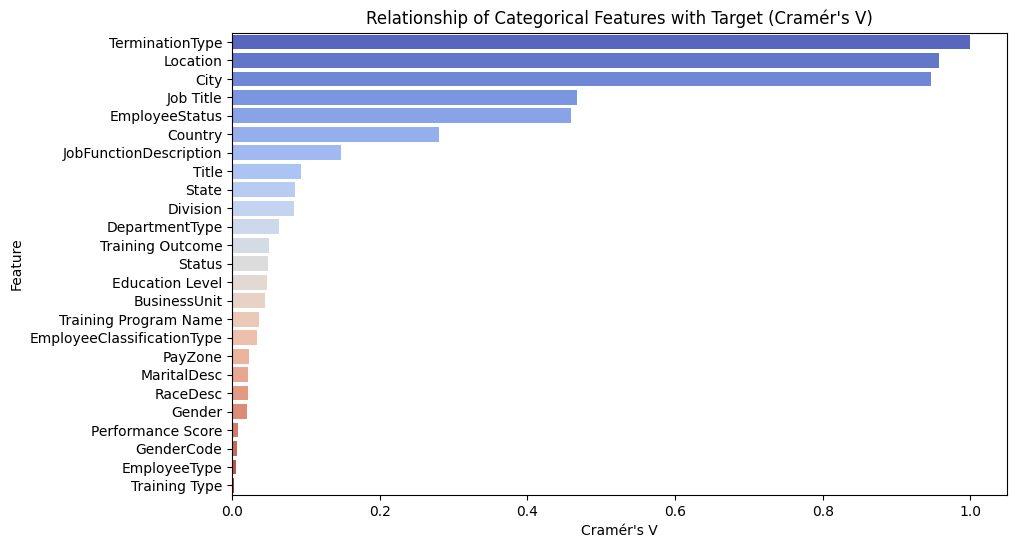

                       Feature  Cramér's V
6              TerminationType    1.000000
24                    Location    0.958021
16                        City    0.946206
19                   Job Title    0.467495
2               EmployeeStatus    0.459359
17                     Country    0.280325
10      JobFunctionDescription    0.147850
0                        Title    0.092617
9                        State    0.085301
8                     Division    0.083530
7               DepartmentType    0.063777
23            Training Outcome    0.050499
20                      Status    0.048971
18             Education Level    0.046671
1                 BusinessUnit    0.043868
21       Training Program Name    0.036625
5   EmployeeClassificationType    0.033933
4                      PayZone    0.022391
13                 MaritalDesc    0.022129
12                    RaceDesc    0.021144
15                      Gender    0.020450
14           Performance Score    0.008151
11         

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Identify categorical features (excluding the target column)
categorical_features = emp_df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('IsActive')  # Remove the target column from the list

# Create an empty dictionary to store the correlation values with the target
corr_with_target = {}

# Calculate Cramér's V between each categorical feature and the target
for feature in categorical_features:
    corr_with_target[feature] = cramers_v(emp_df[feature], emp_df['IsActive'])

# Convert the result to a DataFrame for easy visualization
corr_df = pd.DataFrame(list(corr_with_target.items()), columns=['Feature', 'Cramér\'s V'])
corr_df = corr_df.sort_values(by='Cramér\'s V', ascending=False)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Cramér\'s V', y='Feature', data=corr_df, palette='coolwarm')
plt.title('Relationship of Categorical Features with Target (Cramér\'s V)')
plt.show()

# Display the correlation dataframe
print(corr_df)

In [57]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify all object columns
object_columns = emp_df.select_dtypes(include=['object']).columns

# Step 2: Create a new dataset to hold the encoded values
encoded_df = emp_df.copy()

# Step 3: Exclude 'IsActive', 'Job Title', and 'Country' from the categorical columns for label encoding
categorical_columns = [col for col in object_columns if col not in ['IsActive', 'Job Title', 'Country', 'City', 'Location']]

# Step 4: Apply label encoding to all categorical columns except 'IsActive', 'Job Title', and 'Country'
for col in categorical_columns:
    # Fill missing values for LabelEncoder
    encoded_df[col] = emp_df[col].fillna("Unknown")

    le = LabelEncoder()

    # Fit and transform the encoder, apply it to the copied dataset
    encoded_df[col] = le.fit_transform(encoded_df[col])

    # Save the encoder
    col_name = col.replace(" ", "_")  # Clean column name for valid filename
    joblib.dump(le, f'{col_name}_label_encoder.pkl')

# Step 5: Map 'IsActive' to numeric (1 for Active, 0 for Not Active)
encoded_df['IsActive'] = encoded_df['IsActive'].map({'Active': 1, 'Not Active': 0})

# Step 6: Apply target encoding for 'Job Title' and 'Country'
for col in ['Job Title', 'Country', 'City', 'Location']:
    # Calculate the mean of the target variable for each category in the column
    mean_target = encoded_df.groupby(col)['IsActive'].mean()

    # Map the mean values back to the dataset
    encoded_df[col] = emp_df[col].map(mean_target).fillna(mean_target.mean())  # Fill missing with overall mean

    # Save the target encoding mapping (if needed)
    col_name = col.replace(" ", "_")
    mean_target.to_pickle(f'{col_name}_target_encoder.pkl')

# Display the updated dataframe
encoded_df.head()

,EmpID,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,Division,...,Desired Salary,Job Title,Status,Training Program Name,Training Type,Training Outcome,Location,Training Duration(Days),Training Cost,IsActive
0,1001,26,0,0,2,0,1,3,5,4,...,60103.21,0.666667,2,1,1,1,1.0,4,510.83,1
1,1002,26,4,0,2,0,2,0,5,2,...,64575.84,0.500000,4,2,1,1,0.0,2,582.37,0
2,1003,26,9,0,0,0,1,4,5,6,...,39422.71,0.545455,4,4,1,2,0.0,4,777.06,0
3,1004,26,6,0,2,2,1,0,5,14,...,51045.11,0.250000,4,1,1,0,0.0,2,824.30,0
4,1005,26,7,0,1,1,2,3,5,6,...,52792.86,1.000000,2,0,0,3,1.0,4,145.99,1


### **Feature Scaling**

In [58]:
encoded_df.describe()

,EmpID,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,Division,...,Desired Salary,Job Title,Status,Training Program Name,Training Type,Training Outcome,Location,Training Duration(Days),Training Cost,IsActive
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2500.500000,17.968667,4.485667,0.574333,0.982000,0.963667,1.006667,2.362333,2.947667,9.396667,...,65079.057560,0.489000,1.993667,1.952000,0.503000,1.494333,0.489000,2.975667,558.628697,0.489000
std,866.169729,7.401302,2.868659,1.310870,0.808637,0.818883,0.825944,1.232702,0.822488,6.317327,...,20163.675071,0.233730,1.417379,1.434939,0.500074,1.120887,0.478975,1.417890,263.217698,0.499962
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,30047.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,100.040000,0.000000
25%,1750.750000,18.750000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,6.000000,...,47307.807500,0.333333,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,327.587500,0.000000
50%,2500.500000,21.000000,4.000000,0.000000,1.000000,1.000000,1.000000,3.000000,3.000000,8.000000,...,64934.865000,0.500000,2.000000,2.000000,1.000000,2.000000,0.500000,3.000000,572.125000,0.000000
75%,3250.250000,22.000000,7.000000,0.000000,2.000000,2.000000,2.000000,3.000000,3.000000,11.000000,...,82585.595000,0.666667,3.000000,3.000000,1.000000,2.000000,1.000000,4.000000,786.987500,1.000000
max,4000.000000,30.000000,9.000000,4.000000,2.000000,2.000000,2.000000,4.000000,5.000000,24.000000,...,99992.660000,1.000000,4.000000,4.000000,1.000000,3.000000,1.000000,5.000000,999.970000,1.000000


In [59]:
def get_stats(x):
    frame_dict = {
        'Column':[],
        'Non-null counts':[],
        'Null values':[],
        'Number of unique':[],
        'Unique values':[],
        'Data type':[],
        'Min':[],
        'Max':[],
        'Avg':[]
    }

    for col in x.columns:
        frame_dict['Column'].append(col)
        frame_dict['Non-null counts'].append(x[col].count())
        frame_dict['Null values'].append(x[col].isnull().sum())
        frame_dict['Number of unique'].append(x[col].nunique())
        frame_dict['Unique values'].append(x[col].unique())
        frame_dict['Data type'].append(x[col].dtype)

        if x[col].dtype in ['int64', 'float64']:  # Check if the column is numerical
            frame_dict['Min'].append(x[col].min())
            frame_dict['Max'].append(x[col].max())
            frame_dict['Avg'].append(x[col].mean())
        else:
            # For non-numerical columns, set Min, Max, and Avg as NaN
            frame_dict['Min'].append(None)
            frame_dict['Max'].append(None)
            frame_dict['Avg'].append(None)

    return pd.DataFrame(frame_dict)

# Display the stats
display(get_stats(encoded_df))

,Column,Non-null counts,Null values,Number of unique,Unique values,Data type,Min,Max,Avg
0,EmpID,3000,0,3000,"[1001, 1002, 1003, 1004, 1005, 1006, 1007, 100...",int64,1001.00,4000.00,2500.500000
1,Title,3000,0,31,"[26, 25, 24, 21, 22, 20, 28, 18, 1, 0, 30, 27,...",int64,0.00,30.00,17.968667
2,BusinessUnit,3000,0,10,"[0, 4, 9, 6, 7, 3, 2, 8, 5, 1]",int64,0.00,9.00,4.485667
3,EmployeeStatus,3000,0,5,"[0, 4, 2, 1, 3]",int64,0.00,4.00,0.574333
4,EmployeeType,3000,0,3,"[2, 0, 1]",int64,0.00,2.00,0.982000
5,PayZone,3000,0,3,"[0, 2, 1]",int64,0.00,2.00,0.963667
6,EmployeeClassificationType,3000,0,3,"[1, 2, 0]",int64,0.00,2.00,1.006667
7,TerminationType,3000,0,5,"[3, 0, 4, 1, 2]",int64,0.00,4.00,2.362333
8,DepartmentType,3000,0,6,"[5, 0, 3, 1, 2, 4]",int64,0.00,5.00,2.947667
9,Division,3000,0,25,"[4, 2, 6, 14, 9, 10, 13, 18, 7, 0, 21, 8, 19, ...",int64,0.00,24.00,9.396667


In [60]:
combine = pd.merge(engagement_df,training_df,on=['EmpID'])
#combine['Survey Date'] = pd.to_datetime(combine['Survey Date'])
#combine['Training Date'] = pd.to_datetime(combine['Training Date'])
cat_cols = [col for col in combine.columns if combine[col].dtype == 'O' if col not in ['Location','Trainer']]
num_cols = combine.select_dtypes([np.number]).columns.to_list()
num_cols.remove('EmpID')
def plots(data,col):

    fig = make_subplots(rows = 1, cols=2,subplot_titles=['Distribution of '+ col,'Distribution of '+ col])

    fig.add_traces(go.Histogram(x = data[col],name=str(col),
                                xbins=dict(start=data[col].min(),end=data[col].max()),
                                marker=dict(color='#D7BDE2'),
                                marker_line_width=1,
                                marker_line_color="#BB8FCE"),1,1)

    fig.add_traces(go.Box(y = data[col],name=str(col),marker=dict(color='#D7BDE2'),
                          marker_line_width=1,marker_line_color="#BB8FCE"),1,2)

    fig.update_layout(paper_bgcolor='#F5EEF8', plot_bgcolor = '#F5EEF8',
                      template='plotly_white',
                      xaxis=dict(showgrid=False),
                      yaxis=dict(showgrid=False),
                      showlegend=False,
                      bargap=0.15)

    fig.show()

In [61]:
for i in num_cols:
    plots(combine,i)

In [62]:
fig = make_subplots(rows=1,cols=1, subplot_titles=['Training Cost VS Training Program '])

traces0 = (px.bar( x =combine['Training Program Name'],y=combine['Training Cost'],
                        color=combine['Training Program Name'],
                        color_discrete_map = {'Customer Service':'#9B59B6','Leadership Development':'#1F618D',
                                              'Technical Skills':'#138D75','Communication Skills':'#F1C40F',
                                              'Project Management':'#CA6F1E'})).data
for trace in traces0:
          fig.add_trace(trace,row=1,col=1)


fig.update_layout(paper_bgcolor='#F5EEF8', plot_bgcolor = '#F5EEF8')
fig.show()

In [63]:
display(get_stats(encoded_df))

,Column,Non-null counts,Null values,Number of unique,Unique values,Data type,Min,Max,Avg
0,EmpID,3000,0,3000,"[1001, 1002, 1003, 1004, 1005, 1006, 1007, 100...",int64,1001.00,4000.00,2500.500000
1,Title,3000,0,31,"[26, 25, 24, 21, 22, 20, 28, 18, 1, 0, 30, 27,...",int64,0.00,30.00,17.968667
2,BusinessUnit,3000,0,10,"[0, 4, 9, 6, 7, 3, 2, 8, 5, 1]",int64,0.00,9.00,4.485667
3,EmployeeStatus,3000,0,5,"[0, 4, 2, 1, 3]",int64,0.00,4.00,0.574333
4,EmployeeType,3000,0,3,"[2, 0, 1]",int64,0.00,2.00,0.982000
5,PayZone,3000,0,3,"[0, 2, 1]",int64,0.00,2.00,0.963667
6,EmployeeClassificationType,3000,0,3,"[1, 2, 0]",int64,0.00,2.00,1.006667
7,TerminationType,3000,0,5,"[3, 0, 4, 1, 2]",int64,0.00,4.00,2.362333
8,DepartmentType,3000,0,6,"[5, 0, 3, 1, 2, 4]",int64,0.00,5.00,2.947667
9,Division,3000,0,25,"[4, 2, 6, 14, 9, 10, 13, 18, 7, 0, 21, 8, 19, ...",int64,0.00,24.00,9.396667


Scaling the whole dataset with two scaling techniques: **MinMax Scaler** and **Standardize Scaler**

In [64]:
# Selecting numeric columns
numeric_cols = encoded_df.select_dtypes(include=['int64', 'float64']).columns

# Standardization
standard_scaler = StandardScaler()
emp_df_standardized = encoded_df.copy()
emp_df_standardized[numeric_cols] = standard_scaler.fit_transform(encoded_df[numeric_cols])

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
emp_df_minmax_scaled = encoded_df.copy()
emp_df_minmax_scaled[numeric_cols] = minmax_scaler.fit_transform(encoded_df[numeric_cols])

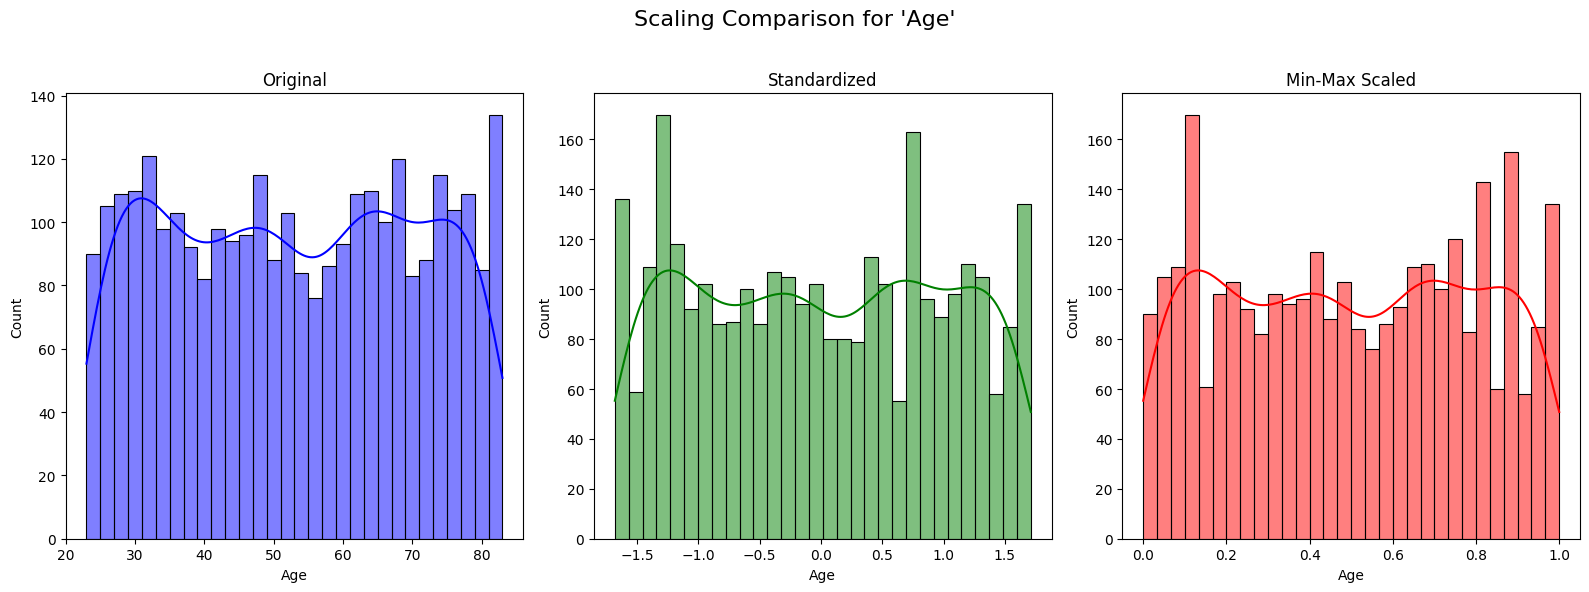

In [65]:
# Plot comparison of original, standardized, and min-max scaled features
def plot_feature_distribution(column, original, standardized, minmax_scaled):
    plt.figure(figsize=(16, 6))
    plt.suptitle(f"Scaling Comparison for '{column}'", fontsize=16)

    # Original distribution
    plt.subplot(1, 3, 1)
    sns.histplot(original[column], kde=True, bins=30, color='blue')
    plt.title('Original')

    # Standardized distribution
    plt.subplot(1, 3, 2)
    sns.histplot(standardized[column], kde=True, bins=30, color='green')
    plt.title('Standardized')

    # Min-Max scaled distribution
    plt.subplot(1, 3, 3)
    sns.histplot(minmax_scaled[column], kde=True, bins=30, color='red')
    plt.title('Min-Max Scaled')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example for a specific feature
feature_to_plot = 'Age'  # Replace with your column name
plot_feature_distribution(feature_to_plot, emp_df, emp_df_standardized, emp_df_minmax_scaled)


In [66]:
# Checking the statistics for the 'Age' column before and after scaling
print("Original Data:")
print(encoded_df['Age'].describe())

print("\nStandardized Data:")
print(emp_df_standardized['Age'].describe())

print("\nMin-Max Scaled Data:")
print(emp_df_minmax_scaled['Age'].describe())

Original Data:
count    3000.000000
mean       52.726667
std        17.692153
min        23.000000
25%        37.000000
50%        52.000000
75%        68.000000
max        83.000000
Name: Age, dtype: float64

Standardized Data:
count    3.000000e+03
mean     2.368476e-18
std      1.000167e+00
min     -1.680498e+00
25%     -8.890545e-01
50%     -4.107967e-02
75%      8.634268e-01
max      1.711402e+00
Name: Age, dtype: float64

Min-Max Scaled Data:
count    3000.000000
mean        0.495444
std         0.294869
min         0.000000
25%         0.233333
50%         0.483333
75%         0.750000
max         1.000000
Name: Age, dtype: float64


Scaling Some of the features with either of the techniques (that suits the feature)

In [67]:
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting columns for scaling
standardize_cols = ['Age', 'Desired Salary', 'Training Cost'] # 'Training Duration(Days)'
#minmax_cols=['Age']
# Copying the original dataset to create the scaled_df
scaled_df = encoded_df.copy()

# Initializing scalers
standard_scaler = StandardScaler()
#minmax_scaler=MinMaxScaler()
# Apply Standardization to the selected columns
scaled_df[standardize_cols] = standard_scaler.fit_transform(scaled_df[standardize_cols])
#scaled_df[minmax_cols] = minmax_scaler.fit_transform(scaled_df[minmax_cols])
# Avoid dropping scaled columns, only drop unnecessary columns
scaled_df.drop(columns=['EmpID'], inplace=True) #'City', 'Location'

# Save the scaler to a file
with open('standard_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(standard_scaler, scaler_file)

scaled_df

,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,Division,State,...,Desired Salary,Job Title,Status,Training Program Name,Training Type,Training Outcome,Location,Training Duration(Days),Training Cost,IsActive
0,26,0,0,2,0,1,3,5,4,10,...,-0.246814,0.666667,2,1,1,1,1.0,4,-0.181624,1
1,26,4,0,2,0,2,0,5,2,10,...,-0.024961,0.500000,4,2,1,1,0.0,2,0.090211,0
2,26,9,0,0,0,1,4,5,6,10,...,-1.272616,0.545455,4,4,1,2,0.0,4,0.829989,0
3,26,6,0,2,2,1,0,5,14,10,...,-0.696118,0.250000,4,1,1,0,0.0,2,1.009490,0
4,26,7,0,1,1,2,3,5,6,10,...,-0.609425,1.000000,2,0,0,3,1.0,4,-1.567932,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,8,3,0,2,2,0,3,2,2,10,...,0.017343,0.428571,3,1,1,1,1.0,2,0.949491,1
2996,8,2,0,0,0,2,3,2,4,23,...,-1.378055,0.250000,0,3,0,1,1.0,4,0.268003,1
2997,8,1,3,1,1,0,1,2,24,23,...,-1.685755,0.333333,4,1,0,0,0.5,1,1.654653,0
2998,8,0,3,1,1,0,0,2,4,23,...,-0.279593,0.600000,0,2,1,2,0.0,5,-0.307206,0


In [68]:
display(get_stats(scaled_df))

,Column,Non-null counts,Null values,Number of unique,Unique values,Data type,Min,Max,Avg
0,Title,3000,0,31,"[26, 25, 24, 21, 22, 20, 28, 18, 1, 0, 30, 27,...",int64,0.000000,30.000000,1.796867e+01
1,BusinessUnit,3000,0,10,"[0, 4, 9, 6, 7, 3, 2, 8, 5, 1]",int64,0.000000,9.000000,4.485667e+00
2,EmployeeStatus,3000,0,5,"[0, 4, 2, 1, 3]",int64,0.000000,4.000000,5.743333e-01
3,EmployeeType,3000,0,3,"[2, 0, 1]",int64,0.000000,2.000000,9.820000e-01
4,PayZone,3000,0,3,"[0, 2, 1]",int64,0.000000,2.000000,9.636667e-01
5,EmployeeClassificationType,3000,0,3,"[1, 2, 0]",int64,0.000000,2.000000,1.006667e+00
6,TerminationType,3000,0,5,"[3, 0, 4, 1, 2]",int64,0.000000,4.000000,2.362333e+00
7,DepartmentType,3000,0,6,"[5, 0, 3, 1, 2, 4]",int64,0.000000,5.000000,2.947667e+00
8,Division,3000,0,25,"[4, 2, 6, 14, 9, 10, 13, 18, 7, 0, 21, 8, 19, ...",int64,0.000000,24.000000,9.396667e+00
9,State,3000,0,28,"[10, 23, 19, 26, 20, 4, 21, 25, 24, 7, 12, 27,...",int64,0.000000,27.000000,1.025833e+01


### **Feature Selection**

**Recursive Feature Elimination (RFE)**

In [69]:
X = scaled_df.drop(columns=['IsActive'])
y = scaled_df['IsActive']

# Use RFE with Random Forest
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=20)
rfe.fit(X, y)

# Selected features
selected_features_rfe = X.columns[rfe.support_].tolist()

# Create a DataFrame for selected features
rfe_selected = pd.DataFrame({
    'Feature': selected_features_rfe,
    'Rank': range(1, len(selected_features_rfe) + 1)  # Rank the features from 1 to N
})

# Optionally, display a styled table (if using a Jupyter Notebook)
rfe_selected.style.set_caption("Features Selected by RFE").set_table_styles(
    [{'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}])

,Feature,Rank
0,Title,1
1,BusinessUnit,2
2,EmployeeStatus,3
3,TerminationType,4
4,DepartmentType,5
5,Division,6
6,JobFunctionDescription,7
7,EmploymentDuration(Years),8
8,Age,9
9,Satisfaction Score,10


**Tree-Base Model**

In [70]:
# Train a Random Forest to compute feature importance
X = scaled_df.drop(columns=['IsActive'])
y = scaled_df['IsActive']
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
importances = rf.feature_importances_
tree_based_importance = (
    pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    .sort_values(by='Importance', ascending=False)
    .reset_index(drop=True)  # Reset the index for cleaner output
)

# Display top features
print("Top Features from Tree-Based Model:")
tree_based_importance.head(20)

Top Features from Tree-Based Model:


,Feature,Importance
0,Location,0.315619
1,City,0.260883
2,TerminationType,0.210561
3,EmploymentDuration(Years),0.104759
4,EmployeeStatus,0.049258
5,Job Title,0.024600
6,Country,0.008699
7,Training Cost,0.002716
8,Desired Salary,0.002178
9,Age,0.001844


In [71]:
!pip install plotly
import plotly.graph_objects as go
import plotly.subplots as sp # Import plotly.subplots as sp


# Create subplots for Tree-Based Importance and RFE Selection
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=["Tree-Based Feature Importance", "RFE Selected Features"])

# Add Tree-Based Feature Importance Plot
fig.add_trace(
    go.Bar(
        x=tree_based_importance['Feature'],
        y=tree_based_importance['Importance'],
        name="Tree-Based Importance",
        marker_color='skyblue'
    ),
    row=1, col=1
)

# Add RFE Selected Features Plot
fig.add_trace(
    go.Bar(
        x=rfe_selected['Feature'],
        y=rfe_selected['Rank'],
        name="RFE Selected",
        marker_color='orange'
    ),
    row=1, col=2
)

# Update layout for better readability
fig.update_layout(
    title_text="Feature Importance Comparison: Tree-Based vs. RFE",
    showlegend=False,
    height=600,
    template="plotly_white"
)

# Rotate x-axis labels for readability
fig.update_xaxes(tickangle=-45, row=1, col=1)
fig.update_xaxes(tickangle=-45, row=1, col=2)

# Display the interactive plot
fig.show()

**Regularizer L1**

In [72]:
# Train a Logistic Regression model with L1 regularization
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=0.01)
lasso.fit(X, y)

# Select features with non-zero coefficients
model = SelectFromModel(lasso, prefit=True)
X_selected = model.transform(X)
selected_features_lasso = X.columns[model.get_support()].tolist()

print("Selected Features:", selected_features_lasso)

Selected Features: ['Title', 'BusinessUnit', 'EmployeeStatus', 'TerminationType', 'Division', 'State', 'JobFunctionDescription', 'EmploymentDuration(Years)', 'City', 'Years of Experience', 'Location']


# **Modeling**

### **Random Forest Classifier Model**

In [73]:
# Prepare the data using the selected features from RFE
X_selected = X[selected_features_rfe]  # Use the selected features from RFE
y = scaled_df['IsActive']  # Your target variable

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier on the selected features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [75]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [76]:
conf_matrix

array([[308,   0],
       [  0, 292]])

In [77]:
# Classification Report
class_report = classification_report(y_test, y_pred)

In [78]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

In [79]:
print("\nClassification Report:")
print(class_report)

print(f"\nAccuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       308
           1       1.00      1.00      1.00       292

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600


Accuracy: 1.0000


In [80]:
# Define the labels
labels = ['Inactive', 'Active']  # True labels

# Create the interactive heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=conf_matrix,  # Do not transpose this matrix
        x=labels,  # Predicted labels on x-axis
        y=labels,  # True labels on y-axis
        colorscale="Blues",
        showscale=True,
        text=conf_matrix,  # Annotates with actual values
        texttemplate="%{text}",  # Display the values inside the cells
        hoverongaps=False,
    )
)

# Update layout for better readability
fig.update_layout(
    title="Interactive Confusion Matrix",
    xaxis_title="Predicted",
    yaxis_title="True",
    xaxis=dict(tickmode="array", tickvals=list(range(len(labels))), ticktext=labels),
    yaxis=dict(tickmode="array", tickvals=list(range(len(labels))), ticktext=labels),
    height=600,
    width=600,
    template="plotly_white",
)

# Show the interactive plot
fig.show()

In [81]:
# Feature Importances from Random Forest
feature_importances = pd.DataFrame({
    'Feature': selected_features_rfe,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

fig = px.bar(
    feature_importances.sort_values(by="Importance", ascending=False),
    x="Importance",
    y="Feature",
    orientation="h",
    title="Interactive Feature Importances from Random Forest",
    color="Importance",
    color_continuous_scale="Viridis",
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Importance",
    yaxis_title="Feature",
    template="plotly_white",
    height=600,
)

fig.show()

### **Gradient Boosting Classifier Model**

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Classification Report
class_report_gb = classification_report(y_test, y_pred_gb)

# Accuracy Score
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("\nGradient Boosting Classification Report:")
print(class_report_gb)
print(f"\nGradient Boosting Accuracy: {accuracy_gb:.4f}")


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       308
           1       1.00      1.00      1.00       292

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600


Gradient Boosting Accuracy: 1.0000


In [83]:
# Feature Importances from Gradient Boosting
feature_importances_gb = pd.DataFrame({
    'Feature': selected_features_rfe,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances using Plotly
fig = px.bar(
    feature_importances_gb,
    x="Importance",
    y="Feature",
    orientation="h",
    title="Feature Importances from Gradient Boosting",
    color="Importance",
    color_continuous_scale="Viridis",
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Importance",
    yaxis_title="Feature",
    template="plotly_white",
    height=600,
)

fig.show()

### **SVC**

In [84]:
from sklearn.svm import SVC

# Train an SVM model
svc_model = SVC(kernel='rbf', random_state=42, probability=True)  # Try 'linear' or 'poly' kernel if needed
svc_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc_model.predict(X_test)

# Confusion Matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Classification Report
class_report_svc = classification_report(y_test, y_pred_svc)

# Accuracy Score
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("\nSVM Classification Report:")
print(class_report_svc)
print(f"\nSVM Accuracy: {accuracy_svc:.4f}")


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       308
           1       0.94      0.99      0.97       292

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600


SVM Accuracy: 0.9683


In [85]:
conf_matrix_svc

array([[291,  17],
       [  2, 290]])

In [86]:
# Define the labels
labels = ['Inactive', 'Active']  # True labels

# Create the interactive heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=conf_matrix_svc,  # Do not transpose this matrix
        x=labels,  # Predicted labels on x-axis
        y=labels,  # True labels on y-axis
        colorscale="Blues",
        showscale=True,
        text=conf_matrix_svc,  # Annotates with actual values
        texttemplate="%{text}",  # Display the values inside the cells
        hoverongaps=False,
    )
)

# Update layout for better readability
fig.update_layout(
    title="Interactive Confusion Matrix",
    xaxis_title="Predicted",
    yaxis_title="True",
    xaxis=dict(tickmode="array", tickvals=list(range(len(labels))), ticktext=labels),
    yaxis=dict(tickmode="array", tickvals=list(range(len(labels))), ticktext=labels),
    height=600,
    width=600,
    template="plotly_white",
)

# Show the interactive plot
fig.show()

In [87]:
import joblib

# Save your trained SVC model
joblib.dump(svc_model, 'svc_model.pkl')

['svc_model.pkl']

# **Interface**

In [88]:
pip install gradio

In [89]:
# Get unique values for 'Country' and 'Job Title' from the original dataframe
country_unique_values = sorted(emp_df['Country'].unique().tolist())
job_title_unique_values = sorted(emp_df['Job Title'].unique().tolist())
city_unique_values = sorted(emp_df['City'].unique().tolist())
location_unique_values = sorted(emp_df['Location'].unique().tolist())

In [90]:
import joblib
import gradio as gr
import numpy as np
import pandas as pd

# Load the necessary encoders and model
svc_model = joblib.load('svc_model.pkl')
scaler = joblib.load('standard_scaler.pkl')

# List of categorical columns and their corresponding label encoders
le_categorical_columns = [
    'Title', 'BusinessUnit', 'EmployeeStatus', 'TerminationType',
    'DepartmentType', 'Division', 'JobFunctionDescription',
    'Status', 'Training Outcome'
]


# Target categorical columns for target encoding
target_categorical_columns = [
    'Country', 'Job Title', 'City', 'Location'
]

# Initialize the 'encoders' dictionary
le_encoders = {}
target_encoders = {}

# Dynamically load label encoders based on column names
for column in le_categorical_columns:
    column_name = column.replace(" ", "_")
    if column == "Training Outcome":
        column_name = "Training_Outcome"
    le_encoder_file = f'{column_name}_label_encoder.pkl'
    try:
        le_encoders[column] = joblib.load(le_encoder_file)
    except FileNotFoundError:
        raise FileNotFoundError(f"Encoder file for '{column}' not found: {le_encoder_file}")

# Dynamically load target encoders based on column names
for column in target_categorical_columns:
    column_name = column.replace(" ", "_")
    if column == "Job Title":
        column_name = "Job_Title"
    target_encoder_file = f'{column_name}_target_encoder.pkl'
    try:
        target_encoders[column] = joblib.load(target_encoder_file)
    except FileNotFoundError:
        raise FileNotFoundError(f"Target encoder file for '{column}' not found: {target_encoder_file}")

# Function to get input data from the user
def get_input_data(
    title, business_unit, employee_status, termination_type, department_type,
    division, job_function_description, job_title,
    status, country, city, location, training_outcome, age, employment_duration_years, satisfaction_score,
    work_life_balance_score, years_of_experience, desired_salary, training_cost
):
    data = {
        'Title': [title],
        'BusinessUnit': [business_unit],
        'EmployeeStatus': [employee_status],
        'TerminationType': [termination_type],
        'DepartmentType': [department_type],
        'Division': [division],
        'JobFunctionDescription': [job_function_description],
        'Job Title': [job_title],
        'Status': [status],
        'Country': [country],
        'City': [city],
        'Location': [location],
        'Training Outcome': [training_outcome],
        'Age': [age],
        'EmploymentDuration(Years)': [employment_duration_years],
        'Satisfaction Score': [satisfaction_score],
        'Work-Life Balance Score': [work_life_balance_score],
        'Years of Experience': [years_of_experience],
        'Desired Salary': [desired_salary],
        'Training Cost': [training_cost]
    }
    return pd.DataFrame(data)

# Function to preprocess and predict using the model
def predict_gradio(
    title, business_unit, employee_status, termination_type, department_type,
    division, job_function_description, job_title,
    status, country, city, location, training_outcome, age, employment_duration_years, satisfaction_score,
    work_life_balance_score, years_of_experience, desired_salary, training_cost
):
    try:
        input_data = get_input_data(
            title, business_unit, employee_status, termination_type, department_type,
            division, job_function_description, job_title, status, country, city,
            location, training_outcome, age, employment_duration_years, satisfaction_score,
            work_life_balance_score, years_of_experience, desired_salary, training_cost
        )

        # Encode categorical features using label encoding
        for column in le_categorical_columns:
            le_encoder = le_encoders.get(column)
            if le_encoder is not None:
                input_data[column] = le_encoder.transform(input_data[column].astype(str))
            else:
                raise ValueError(f"Encoder for {column} not found")

        # Add target encoding (mean encoding) for specified categorical columns
        for column in target_categorical_columns:
            target_encoder = target_encoders.get(column)
            if target_encoder is not None:
                input_data[column] = input_data[column].map(target_encoder)
            else:
                raise ValueError(f"Target encoder for {column} not found")

        # Handle numerical columns separately
        numerical_columns = ['Age', 'Desired Salary', 'Training Cost']
        input_data_scaled = scaler.transform(input_data[numerical_columns])

        # Combine encoded categorical and numerical features explicitly
        encoded_categorical = input_data[le_categorical_columns].values
        target_encoded = input_data[target_categorical_columns].values
        numerical_features = input_data_scaled

        input_data_final = np.hstack((
            encoded_categorical,
            target_encoded,
            numerical_features,
            input_data[['EmploymentDuration(Years)', 'Satisfaction Score', 'Work-Life Balance Score', 'Years of Experience']].values
        ))

        # Make prediction and get probabilities
        prediction = svc_model.predict(input_data_final)
        prediction_proba = svc_model.predict_proba(input_data_final)

        prediction_message = "The employee will stay" if prediction[0] == 1 else "The employee will leave"
        probabilities_message = (
            f"Probability of the employee staying: {prediction_proba[0][1] * 100:.2f}%\n"
            f"Probability of the employee leaving: {prediction_proba[0][0] * 100:.2f}%"
        )

        return prediction_message, probabilities_message

    except Exception as e:
        return "Error occurred", str(e)

# Gradio Interface
inputs = [
    gr.Dropdown(le_encoders['Title'].classes_.tolist(), label="Title", value=None),
    gr.Dropdown(le_encoders['BusinessUnit'].classes_.tolist(), label="Business Unit", value=None),
    gr.Dropdown(le_encoders['EmployeeStatus'].classes_.tolist(), label="Employee Status", value=None),
    gr.Dropdown(le_encoders['TerminationType'].classes_.tolist(), label="Termination Type", value=None),
    gr.Dropdown(le_encoders['DepartmentType'].classes_.tolist(), label="Department Type", value=None),
    gr.Dropdown(le_encoders['Division'].classes_.tolist(), label="Division", value=None),
    gr.Dropdown(le_encoders['JobFunctionDescription'].classes_.tolist(), label="Job Function Description", value=None),
    gr.Dropdown(job_title_unique_values, label="Job Title", value=None),  # Use unique values
    gr.Dropdown(le_encoders['Status'].classes_.tolist(), label="Status", value=None),
    gr.Dropdown(country_unique_values, label="Country", value=None),  # Use unique values
    gr.Dropdown(city_unique_values, label="City", value=None),  # Use unique values
    gr.Dropdown(location_unique_values, label="Location", value=None),  # Use unique values
    gr.Dropdown(le_encoders['Training Outcome'].classes_.tolist(), label="Training Outcome", value=None),
    gr.Slider(0, 20, step=1, label="Employment Duration (Years)"),
    gr.Slider(18, 90, step=1, label="Age"),
    gr.Slider(1, 5, step=1, label="Satisfaction Score"),
    gr.Slider(1, 5, step=1, label="Work-Life Balance Score"),
    gr.Slider(0, 30, step=1, label="Years of Experience"),
    gr.Slider(30000, 200000, label="Desired Salary (USD)"),
    gr.Slider(100, 10000, label="Training Cost (USD)"),
]

outputs = [
    gr.Label(label="Prediction"),
    gr.Textbox(label="Probability Details")
]

gr.Interface(
    fn=predict_gradio,
    inputs=inputs,
    outputs=outputs,
    title="Employee Retention Prediction",
    description="Enter employee details to predict their likelihood of staying or leaving."
).launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9b4819e8e8578530de.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## **Streamlit**

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib
import time

# Load your pre-trained model and the necessary encoders/scalers
svc_model = joblib.load('svc_model.pkl')  # Load the trained SVC model
scaler = joblib.load('standard_scaler.pkl')  # Load the scaler for numerical features

# Load individual label encoders for each categorical feature
le_title = joblib.load('Title_encoder.pkl')
le_business_unit = joblib.load('BusinessUnit_encoder.pkl')
le_employee_status = joblib.load('EmployeeStatus_encoder.pkl')
le_termination_type = joblib.load('TerminationType_encoder.pkl')
le_department_type = joblib.load('DepartmentType_encoder.pkl')
le_division = joblib.load('Division_encoder.pkl')
le_job_function_description = joblib.load('JobFunctionDescription_encoder.pkl')
le_race_desc = joblib.load('RaceDesc_encoder.pkl')
le_country = joblib.load('Country_encoder.pkl')
le_job_title = joblib.load('Job Title_encoder.pkl')
le_status = joblib.load('Status_encoder.pkl')

# Streamlit app
st.title("Simulated Real-Time Dashboard")

st.sidebar.header("Input Parameters")

# Function to get input data from the user
def get_input_data():
    # Get unique categories for each feature
    title_options = le_title.classes_
    business_unit_options = le_business_unit.classes_
    employee_status_options = le_employee_status.classes_
    termination_type_options = le_termination_type.classes_
    department_type_options = le_department_type.classes_
    division_options = le_division.classes_
    job_function_description_options = le_job_function_description.classes_
    race_desc_options = le_race_desc.classes_
    country_options = le_country.classes_
    job_title_options = le_job_title.classes_
    status_options = le_status.classes_

    # Use Streamlit widgets with the extracted options
    title = st.sidebar.selectbox("Title", title_options)
    business_unit = st.sidebar.selectbox("Business Unit", business_unit_options)
    employee_status = st.sidebar.selectbox("Employee Status", employee_status_options)
    termination_type = st.sidebar.selectbox("Termination Type", termination_type_options)
    department_type = st.sidebar.selectbox("Department Type", department_type_options)
    division = st.sidebar.selectbox("Division", division_options)
    job_function_description = st.sidebar.selectbox("Job Function Description", job_function_description_options)
    race_desc = st.sidebar.selectbox("Race Description", race_desc_options)
    country = st.sidebar.selectbox("Country", country_options)
    job_title = st.sidebar.selectbox("Job Title", job_title_options)
    status = st.sidebar.selectbox("Status", status_options)

    # Numerical features as sliders
    employment_duration = st.sidebar.slider("Employment Duration (Years)", 0, 40, 5)
    age = st.sidebar.slider("Age", 18, 80, 30)
    satisfaction_score = st.sidebar.slider("Satisfaction Score", 1, 10, 7)
    work_life_balance_score = st.sidebar.slider("Work-Life Balance Score", 1, 10, 7)
    years_of_experience = st.sidebar.slider("Years of Experience", 0, 40, 5)
    desired_salary = st.sidebar.slider("Desired Salary (USD)", 30000, 200000, 60000)
    training_duration_days = st.sidebar.slider("Training Duration (Days)", 0, 365, 30)
    training_cost = st.sidebar.slider("Training Cost (USD)", 0, 20000, 1000)

    # Return the input data as a DataFrame
    data = {
        'Title': [title],
        'BusinessUnit': [business_unit],
        'EmployeeStatus': [employee_status],
        'TerminationType': [termination_type],
        'DepartmentType': [department_type],
        'Division': [division],
        'JobFunctionDescription': [job_function_description],
        'RaceDesc': [race_desc],
        'Country': [country],
        'JobTitle': [job_title],
        'Status': [status],
        'EmploymentDuration': [employment_duration],
        'Age': [age],
        'Satisfaction Score': [satisfaction_score],
        'Work-Life Balance Score': [work_life_balance_score],
        'Years of Experience': [years_of_experience],
        'Desired Salary': [desired_salary],
        'Training Duration(Days)': [training_duration_days],
        'Training Cost': [training_cost]
    }

    return pd.DataFrame(data)

# Function to preprocess and predict using the model
def predict(input_data):
    # Define the categorical columns to encode
    categorical_columns = [
        'Title', 'BusinessUnit', 'EmployeeStatus', 'TerminationType',
        'DepartmentType', 'Division', 'JobFunctionDescription', 'RaceDesc',
        'Country', 'JobTitle', 'Status'
    ]

    # Encode categorical features
    input_data_encoded = input_data.copy()
    for column in categorical_columns:
        input_data_encoded[column] = globals()[f'le_{column.lower()}'].transform(input_data[column])

    # Define the numerical columns that were scaled during training
    numerical_columns = ['EmploymentDuration', 'Age', 'Desired Salary', 'Training Cost', 'Training Duration(Days)']

    # Extract the numerical columns from the input data
    input_data_numerical = input_data_encoded[numerical_columns]

    # Scale the extracted numerical features
    input_data_scaled = scaler.transform(input_data_numerical)

    # Combine the categorical and scaled numerical features
    input_data_final = np.hstack((input_data_encoded[categorical_columns].values, input_data_scaled))

    # Use the model to predict
    prediction = svc_model.predict(input_data_final)

    return prediction

# Streamlit button for prediction
if st.button('Predict'):
    # Get user input
    input_data = get_input_data()

    # Make the prediction
    prediction = predict(input_data)

    # Display the result
    st.write(f"Simulated Prediction: {prediction[0]}")

2024-11-27 13:27:03.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 13:27:03.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 13:27:03.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 13:27:03.363 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 13:27:03.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 13:27:03.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 13:27:03.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 13:27:03.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip install streamlit pyngrok